                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

<ipython-input-14-f898913a20e4>:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather_data["Formatted Date"] = pd.to_datetime(weather_data["Formatted Date"])


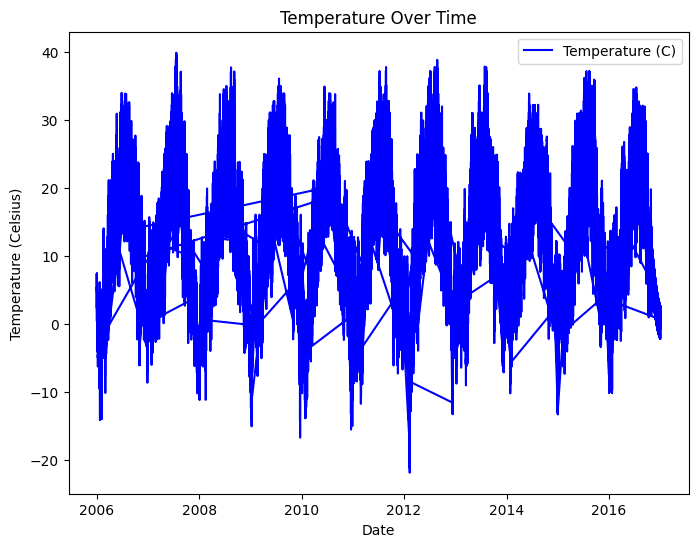

In [14]:
# LINE PLOT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv("/content/weatherHistory.csv")

print(weather_data.head())

weather_data["Formatted Date"] = pd.to_datetime(weather_data["Formatted Date"])
weather_data.set_index("Formatted Date", inplace=True)

plt.figure(figsize=(8, 6))
plt.plot(weather_data.index, weather_data["Temperature (C)"], label="Temperature (C)", color="blue")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.title("Temperature Over Time")
plt.legend()
plt.show()




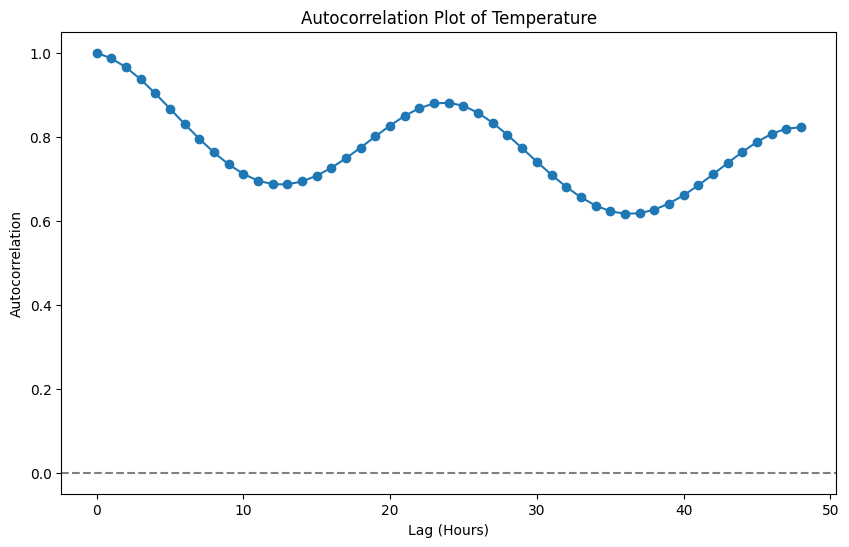

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming weather_data is already loaded and preprocessed

# Calculate autocorrelation
autocorrelation = sm.tsa.acf(weather_data["Temperature (C)"], nlags=48)  # Calculate for 48 lags (2 days)

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.plot(autocorrelation, marker='o')
plt.title("Autocorrelation Plot of Temperature")
plt.xlabel("Lag (Hours)")
plt.ylabel("Autocorrelation")
plt.axhline(y=0, color='gray', linestyle='--')  # Add horizontal line at 0
plt.show()

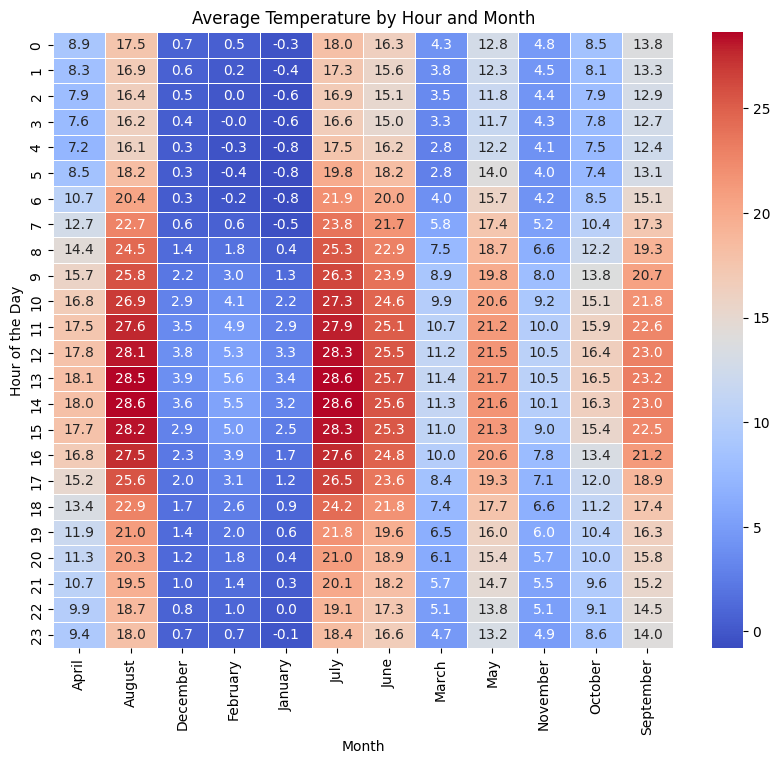

In [24]:
#SCATTER PLOT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv("/content/weatherHistory.csv")

weather_data["Formatted Date"] = pd.to_datetime(weather_data["Formatted Date"], errors="coerce", utc=True)

weather_data = weather_data.dropna(subset=["Formatted Date"])

weather_data["Month"] = weather_data["Formatted Date"].dt.month_name()
weather_data["Hour"] = weather_data["Formatted Date"].dt.hour

heatmap_data = weather_data.pivot_table(
    values="Temperature (C)",
    index="Hour",
    columns="Month",
    aggfunc="mean"
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Average Temperature by Hour and Month")
plt.xlabel("Month")
plt.ylabel("Hour of the Day")
plt.show()




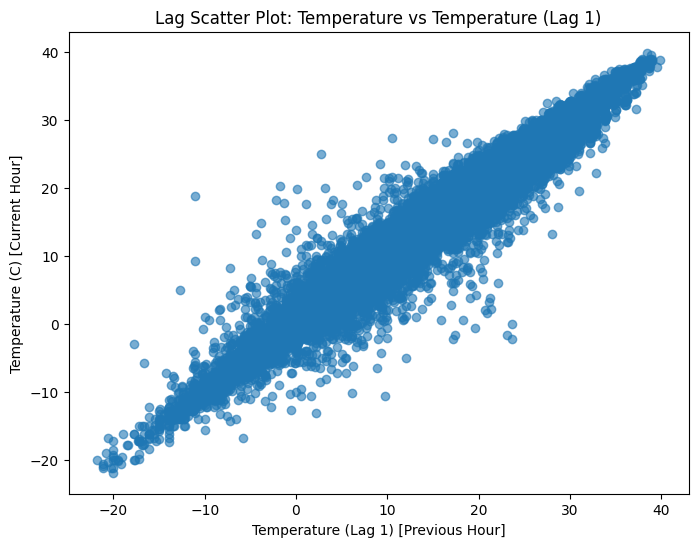

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


weather_data = pd.read_csv("/content/weatherHistory.csv")

# Create a lagged version of the 'Temperature (C)' column (lag = 1)
weather_data["Temperature Lag1"] = weather_data["Temperature (C)"].shift(1)

# Drop NaN values (created by the shift)
weather_data = weather_data.dropna(subset=["Temperature Lag1"])

# Create the lag scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weather_data["Temperature Lag1"], weather_data["Temperature (C)"], alpha=0.6)
plt.title("Lag Scatter Plot: Temperature vs Temperature (Lag 1)")
plt.xlabel("Temperature (Lag 1) [Previous Hour]")
plt.ylabel("Temperature (C) [Current Hour]")
plt.show()


<ipython-input-13-73c4958b8989>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="Temperature (C)", data=weather_data, palette="coolwarm", order=[


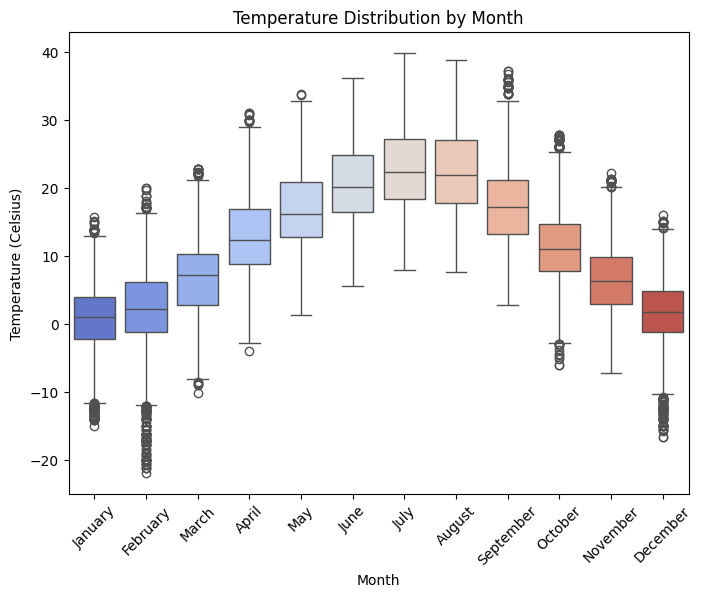

In [13]:
#BOX PLOT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


weather_data = pd.read_csv("/content/weatherHistory.csv")

weather_data["Formatted Date"] = pd.to_datetime(weather_data["Formatted Date"], errors="coerce", utc=True)


weather_data = weather_data.dropna(subset=["Formatted Date"])

weather_data["Month"] = weather_data["Formatted Date"].dt.month_name()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Month", y="Temperature (C)", data=weather_data, palette="coolwarm", order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title("Temperature Distribution by Month")
plt.xticks(rotation=45)
plt.show()



